#DOMAIN: Digital content and entertainment industry

##CONTEXT
The objective of this project is to build a text classification model that analyses the customer's
sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build
an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

##DATA DESCRIPTION:
The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative).
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For
convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most
frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of
10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

##PROJECT OBJECTIVE:
To Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

### Importing the data

In [1]:
#### Add your code here ####
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPool1D, LSTM, TimeDistributed, Flatten
from matplotlib import pyplot
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000, maxlen=300)

17464789/17464789 [==============================] - 2s 0us/step


In [2]:
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)

(19051,)
(19450,)
[1 0 0 ... 0 1 0]
[0 1 0 ... 0 0 0]


In [3]:
# Summarize number of Labels
print("Labels: ")
print(np.unique(y_train))

Labels: 
[0 1]


In [4]:
X_train_max_len = max(len(x) for x in X_train)
print("Max length of sequence in X_train: {}".format(X_train_max_len))

X_test_max_len = max(len(x) for x in X_test)
print("Max length of sequence in X_test:  {}".format(X_test_max_len))

Max length of sequence in X_train: 299
Max length of sequence in X_test:  299


### Padding each sentence to be of same length

Review length: 
Mean 159.68 words (60.730229)


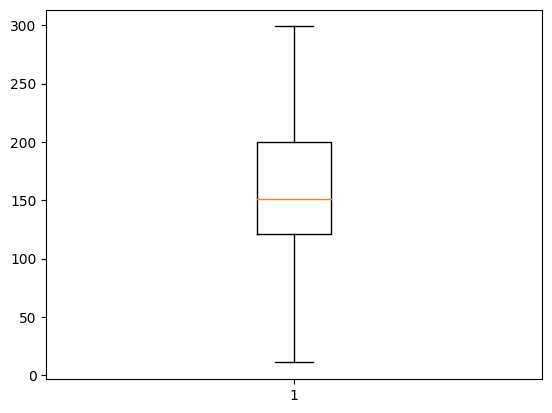

In [5]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

# we can see that max reviews are under the 500 characters mark

In [7]:
#padding to 300 length
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_padded = pad_sequences(X_train, maxlen=300)
X_test_padded = pad_sequences(X_test, maxlen=300)

### Print shape of features & labels

Number of review, number of words in each review

In [8]:

# summarize size
# number of reviews
print("Number of reviews in x_train: {}".format(len(X_train)))
print("Number of reviews in x_test: {}".format(len(X_test)))
#print("Padded Training and Test data: ")
#print(len(X_train.shape))
#print(len(X_test.shape))

Number of reviews in x_train: 19051
Number of reviews in x_test: 19450


In [9]:

# number of words in each review
print("Number of words in each review is {0}".format(X_train_padded[0].shape[0]))

Number of words in each review is 300


Number of labels

In [10]:

y_train.shape

(19051,)

In [11]:

y_test.shape
print("Unique Labels: ")
print(np.unique(y_train))

Unique Labels: 
[0 1]


### Print value of any one feature and it's label

Feature value

In [12]:

print("Value of the 100th review:" ,X_train[100])

Value of the 100th review: [1, 14, 9, 6, 389, 20, 19, 6, 253, 1096, 65, 5, 4, 6891, 7, 1181, 3855, 5, 4, 620, 756, 7, 803, 674, 11, 113, 97, 14, 6, 55, 467, 2525, 20, 92, 387, 4, 2, 7, 4, 182, 2, 25, 39, 319, 14, 2065, 47, 389, 388, 5, 13, 594, 33, 4, 192, 15, 212, 9, 115, 2525, 88, 156, 40, 2065, 97, 170, 39, 486, 8, 622, 1801, 168, 6529, 776, 87, 20, 32, 187]


Label value

In [13]:

print("Sentiment Label:", y_train[100])

Sentiment Label: 1


### Decoding the feature value to get original sentence

First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

In [14]:

imdb_wordindex = imdb.get_word_index()

1641221/1641221 [==============================] - 1s 1us/step


Now use the dictionary to get the original words from the encodings, for a particular sentence

In [15]:

index_from = 3
imdb_wordindex = {key:value + index_from for key, value in imdb_wordindex.items()}
imdb_wordindex['the']

4

In [16]:
inverted_word = {value: key for key, value in imdb_wordindex.items()}
[inverted_word[index] for index in X_train[100] if index > index_from]

['this',
 'is',
 'a',
 'wonderful',
 'movie',
 'with',
 'a',
 'fun',
 'clever',
 'story',
 'and',
 'the',
 'dynamics',
 'of',
 'culture',
 'differences',
 'and',
 'the',
 'running',
 'theme',
 'of',
 "what's",
 'important',
 'in',
 'life',
 'make',
 'this',
 'a',
 'very',
 'under',
 'appreciated',
 'movie',
 "don't",
 'let',
 'the',
 'of',
 'the',
 'world',
 'you',
 'from',
 'seeing',
 'this',
 'keaton',
 'has',
 'wonderful',
 'moments',
 'and',
 'i',
 'wonder',
 'at',
 'the',
 'fact',
 'that',
 'comedy',
 'is',
 'never',
 'appreciated',
 'because',
 'actors',
 'like',
 'keaton',
 'make',
 'going',
 'from',
 'humor',
 'to',
 'serious',
 'bits',
 'look',
 'tremendously',
 'easy',
 'great',
 'movie',
 'all',
 'around']

Get the sentiment for the above sentence
- positive (1)
- negative (0)

In [17]:

y_train[100]
# confirmed that the review is bad and the label also confirmed the same

1

### Define model
- Defining a Sequential Model

In [18]:


vocabulary = 10000
max_words = 300

model = Sequential()
model.add(Embedding(vocabulary, 100, input_length=max_words))
model.add(LSTM(100,return_sequences= True))
dense_layer = Dense(100, activation='relu')
model.add(TimeDistributed(dense_layer))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [19]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

### Print model summary

In [20]:

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 100)          80400     
                                                                 
 time_distributed (TimeDistr  (None, 300, 100)         10100     
 ibuted)                                                         
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 30001     
                                                                 
Total params: 1,120,501
Trainable params: 1,120,501
Non-trainable params: 0
______________________________________________

### Fit the model

In [26]:

model.fit(X_train_padded, y_train, epochs=15, batch_size=64)

Epoch 1/15
298/298 [==============================] - 9s 31ms/step - loss: 0.0284 - accuracy: 0.9906
Epoch 2/15
298/298 [==============================] - 9s 30ms/step - loss: 0.0269 - accuracy: 0.9903
Epoch 3/15
298/298 [==============================] - 6s 22ms/step - loss: 0.0207 - accuracy: 0.9928
Epoch 4/15
298/298 [==============================] - 6s 20ms/step - loss: 0.0187 - accuracy: 0.9934
Epoch 5/15
298/298 [==============================] - 7s 22ms/step - loss: 0.0189 - accuracy: 0.9935
Epoch 6/15
298/298 [==============================] - 6s 20ms/step - loss: 0.0136 - accuracy: 0.9952
Epoch 7/15
298/298 [==============================] - 6s 21ms/step - loss: 0.0057 - accuracy: 0.9983
Epoch 8/15
298/298 [==============================] - 5s 17ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 9/15
298/298 [==============================] - 6s 20ms/step - loss: 0.0054 - accuracy: 0.9980
Epoch 10/15
298/298 [==============================] - 7s 23ms/step - loss: 0.0202 - accura

### Evaluating model

In [45]:

scores, accuracy = model.evaluate(X_test_padded, y_test, verbose=0)
print("Score: {:.4f}".format(scores))
print("Accuracy: {:.4f}".format(accuracy))

Score: 1.1138
Accuracy: 0.8640


### Predict on one sample

In [43]:
#### Add your code here ####
goodsample = "i liked the movie"
badsample = "the movies quality was poor"

In [44]:

for review in [goodsample, badsample]:
    encoded_review = []
    review_split = review.split(" ")
    for word in review_split:
        encoded_review.append(imdb_wordindex[word])
    review_padded = pad_sequences([encoded_review], maxlen=300)
    pred = model.predict(review_padded)
    if pred > 0.6:
        sentiment = 'positive'
    else:
        sentiment = 'negative'
    print("Review: {0}\n\tSentiment: {1}".format(review, sentiment))

1/1 [==============================] - 0s 31ms/step
Review: i liked the movie
	Sentiment: positive
1/1 [==============================] - 0s 29ms/step
Review: the movies quality was poor
	Sentiment: negative


# part2

#DOMAIN: Social media analytics

##CONTEXT:
Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based
supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to
other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project,
the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

##DATA DESCRIPTION:

The dataset is collected from two news websites, theonion.com and huffingtonpost.com.
This new dataset has the following advantages over the existing Twitter datasets:
Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This
reduces the sparsity and also increases the chance of finding pre-trained embeddings.
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as
compared to Twitter datasets.
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the
real sarcastic elements
Content: Each record consists of three attributes:
is_sarcastic: 1 if the record is sarcastic otherwise 0
headline: the headline of the news article
article_link: link to the original news article. Useful in collecting supplementary data
Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection

##PROJECT OBJECTIVE:
Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

In [15]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 42.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [24]:
#Set your project path
project_path =  '/content/drive/My Drive/nlp/'

##Exploring Data

In [6]:
import pandas as pd
import os

data = pd.read_json(os.path.join(project_path,'Sarcasm_Headlines_Dataset.json'),lines=True)

In [7]:
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [8]:
print (data.shape)
data.describe()

(26709, 3)


,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [9]:
data['headline'][1]

"the 'roseanne' revival catches up to our thorny political mood, for better and worse"

In [10]:
##The column headline needs to be cleaned up as we have special characters and numbers in the column

import re
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
def cleanData(text):
  text = re.sub(r'\d+', '', text)
  text = "".join([char for char in text if char not in string.punctuation])
  return text

data['headline']=data['headline'].apply(cleanData)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
data['headline'][1]

'the roseanne revival catches up to our thorny political mood for better and worse'

## Drop `article_link` from dataset.
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [12]:
data.drop('article_link',inplace=True,axis=1)

## Get the Length of each line and find the maximum length.
As different lines are of different length. We need to pad the our sequences using the max length.

In [13]:
maxlen = max([len(text) for text in data['headline']])

## Import required modules required for model building.

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model.

In [17]:
max_features = 10000
maxlen = max([len(text) for text in data['headline']])
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.


In [18]:
tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(data['headline'])

##Define features and lbels for your model.

In [19]:
X = tokenizer.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

## Get the Vocabulary size


In [20]:
num_words=len(tokenizer.word_index)
print (num_words)

27667


## Word Embedding

##Get Glove Word Embeddings

In [25]:
glove_file = project_path + "glove.6B.zip"

In [26]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file from drive.

In [27]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [36]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

IndexError: ignored

##Create and Compile your Model



In [29]:
### Embedding layer for hint
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint
## model.add(Bidirectional(LSTM(128, return_sequences = True)))
import tensorflow as tf

input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(embedding_matrix.shape[0],output_dim=200,weights=[embedding_matrix],input_length=maxlen, trainable=True)(input_layer)
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(2,activation='softmax')(dense)

##Model Fit


In [30]:
batch_size = 100
epochs = 5

model = Model(input_layer,out)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 240)]             0         
                                                                 
 embedding (Embedding)       (None, 240, 200)          5533400   
                                                                 
 bidirectional (Bidirection  (None, 256)               336896    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                             

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
214/214 [==============================] - 37s 114ms/step - loss: 0.4467 - accuracy: 0.7866
Epoch 2/5
214/214 [==============================] - 11s 51ms/step - loss: 0.2651 - accuracy: 0.8918
Epoch 3/5
214/214 [==============================] - 9s 44ms/step - loss: 0.1813 - accuracy: 0.9286
Epoch 4/5
214/214 [==============================] - 8s 37ms/step - loss: 0.1161 - accuracy: 0.9570
Epoch 5/5
214/214 [==============================] - 8s 39ms/step - loss: 0.0775 - accuracy: 0.9714


In [32]:
test_pred = model.predict(np.array(X_test), verbose=1)

167/167 [==============================] - 3s 10ms/step


In [33]:
test_pred = [1 if j>i else 0 for i,j in test_pred]

##Model Evaluation

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[2712,  319],
       [ 402, 1909]])

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3031
           1       0.86      0.83      0.84      2311

    accuracy                           0.87      5342
   macro avg       0.86      0.86      0.86      5342
weighted avg       0.86      0.87      0.86      5342

